In [10]:
from celeba_dcgan import Generator
import torch
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

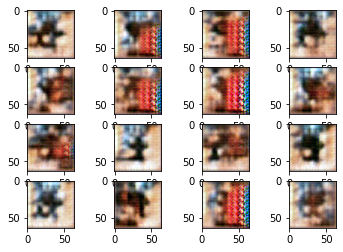

In [43]:
def test1():
    batch_size = 16
    d_z = 32
    gen = Generator(d_z).to(device)
    fname = "data/ckpts/ckpt_iter_{:07d}".format(1200)
    ckpt = torch.load(fname)
    gen.load_state_dict(ckpt["gen"])
    gen.eval()
    with torch.no_grad():
        z = torch.randn((batch_size, d_z), device=device)
        fake_x = gen(z)
    fake_x = fake_x.cpu()
    imgs = np.transpose(torch.clamp(0.5+0.5*fake_x, 0.0, 1.0).numpy(), axes=[0, 2, 3, 1])
    show_img_grid(imgs)
    
def show_img_grid(imgs):
    for i in range(4):
        for j in range(4):
            idx = 4*i+j
            plt.subplot(4, 4, idx+1)
            img = imgs[idx]
            plt.imshow(img)
    plt.show()
    
test1()